<h1 style="text-align: center;">Data Products: How to Build</h1>
<h3 style="text-align: center;">Employee Attrition: IBM HR Case Study</h3>
<hr>


# Objective:
This notebook is to give a quick overview of how to build a software product which uses data (resulted from using other software products) to provifr value to a business. 


# Data Producs

<img src="assets/DP_Types.PNG"/><br>

**Descriptive models:** <br>
To understancd what is going on and giving insights into the past .. "What has happened?" 

**Predictive models:** <br>
To understancd what could hapen in the future .. "What might happen?" 

Interstingly, such products allow managers/decision makers to prescribe possible actions towards a resolution of an issue. For example, prior knowledge, that an employee is more likely to leave, should help managers decide to start hiring of someone else.

# Data Types
<img src="assets/data_types.PNG">
<br><br>

**Numerical data:** has meaning as a measurement.
    * Discrete data: can be counted; Number of Companies Worked at.
    * Continuous data: represents measurements; Hourly Rate, Monthly Income.


**Categorical data:** it represents characteristics.
    * Ordinal data: represents discrete and ordered units; Age Group.
    * Nominal data: represents discrete units and that have no quantitative value; Education Field, Department.
    

The importance of this discrimination between the different data types is to correctly apply the statistical measurements, correctly use charts, and, most importantly, to correctly employ the ML models. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             confusion_matrix)
from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     learning_curve,
                                     validation_curve,
                                     train_test_split)
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

## Data Product Life Cycle
<hr>
<img src="assets/DSLifeCycle.PNG">


# Exploratory Data Analysis (EDA)
In this phase, by data visualisation, we explore data in order to:
<ul>
  <li>Look at Data Distribution</li>
  <li>Discover Data Correlation</li>
  <li>Discover Insights</li>
  <li>Identify Missing Values</li>
  <li>Detect Outliers</li>
  <li>Discover Features (Variables)</li>
</ul>
This phase could help give (somehow) answers to: <b>How</b>, <b>Waht</b> and <b>Why</b> questions.

## Loading Data
In this notebook we use a testing dample published by IBM. 

In [2]:
data_df = pd.read_excel('data/IBM-Dataset-HR-Employee-Attrition.xlsx')
data_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Data Mapping**
<br>

<table class="table table-bordered center">
    <thead><tr><th style="text-align:center;">Variable</th><th style="text-align:center;">Mapping</th></tr></thead>
    <tr><td>Education</td><td>1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'</td></tr>
    <tr><td>EnvironmentSatisfaction</td> <td>1 'Low' 2 'Medium' 3 'High' 4 'Very High'</td></tr>
    <tr><td>JobInvolvement</td><td>1 'Low' 2 'Medium' 3 'High' 4 'Very High'</td></tr>
    <tr><td>JobSatisfaction</td><td>1 'Low' 2 'Medium' 3 'High' 4 'Very High'</td></tr>
    <tr><td>PerformanceRating</td><td>1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'</td></tr>
    <tr><td>RelationshipSatisfaction</td><td>1 'Low' 2 'Medium' 3 'High' 4 'Very High'</td></tr>
    <tr><td>WorkLifeBalance</td><td>1 'Bad' 2 'Good' 3 'Better' 4 'Best'</td></tr>
    <tr><td>Attrition</td><td> - Yes: Left
 - No: Did not leave</td></tr>
</table>
  <br>

## Data Pre-Processing

In [3]:
def get_value_slice(n, bins, labels):
    for i,x in enumerate(bins):
        try:
            # if int(n) in range(bins[i],bins[i+1]):
            # if n in range(bins[i],bins[i+1]):
            if n >= bins[i] and n < bins[i+1]:
                return labels[i]
        except Exception as e:
            # print(str(e), '-----', n, labels)
            return labels[-1]
        
def set_category(df, init_col, target_col, bins, labels):
    df[target_col] = df.apply(lambda x: get_value_slice(x[init_col], bins, labels), axis=1)

In [4]:
data_df['Age_Group'] = ''
set_category(data_df,'Age', 'Age_Group', [0, 25, 35, 45, 55, 150],['17-25','25-35','35-45','45-55','55>'])

## Missing Data check

In [5]:
df_missing_type = []
for column in data_df.columns:
    d= {'Column': column,
        'Data Type': str(data_df[column].dtypes),
        'Number of Missing Valuess': data_df[column].isnull().sum()
        }
    df_missing_type.append(d)
pd.DataFrame(df_missing_type)

,Column,Data Type,Number of Missing Valuess
0,Age,int64,0
1,Attrition,object,0
2,BusinessTravel,object,0
3,DailyRate,int64,0
4,Department,object,0
5,DistanceFromHome,int64,0
6,Education,int64,0
7,EducationField,object,0
8,EmployeeCount,int64,0
9,EmployeeNumber,int64,0


### Dependent Variable (Target)

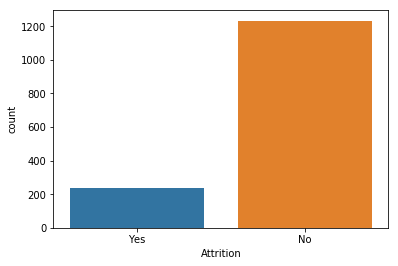

In [6]:
sns.countplot(data=data_df, x="Attrition")

From the graph above, it can be seen that we have an imbalanced dataset. That is, the majority of observations are of the value: 'NO'. There are  84% of observations of the whole dataset having 'No', while 16% of the observations with the 'Yes' value.

Let's see how such a case will affect our boservations and the desired predictive model as well.

### Independent Variable Lists

In [7]:
# Continuous Data
columns_num = ['Age', 'HourlyRate', 'DailyRate', 'MonthlyRate', 'MonthlyIncome', 'PercentSalaryHike',
               'DistanceFromHome', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion']

# Categorical Data
columns_cat = ["Gender", "Age_Group", "MaritalStatus", "Education", "EducationField", "WorkLifeBalance", 
               "Department", "EnvironmentSatisfaction", "JobSatisfaction", 
               "OverTime", "JobLevel", "JobInvolvement",  "PerformanceRating", 
               'YearsWithCurrManager', 'NumCompaniesWorked', 
               "TrainingTimesLastYear", "BusinessTravel"
               ]

### Data Correlation

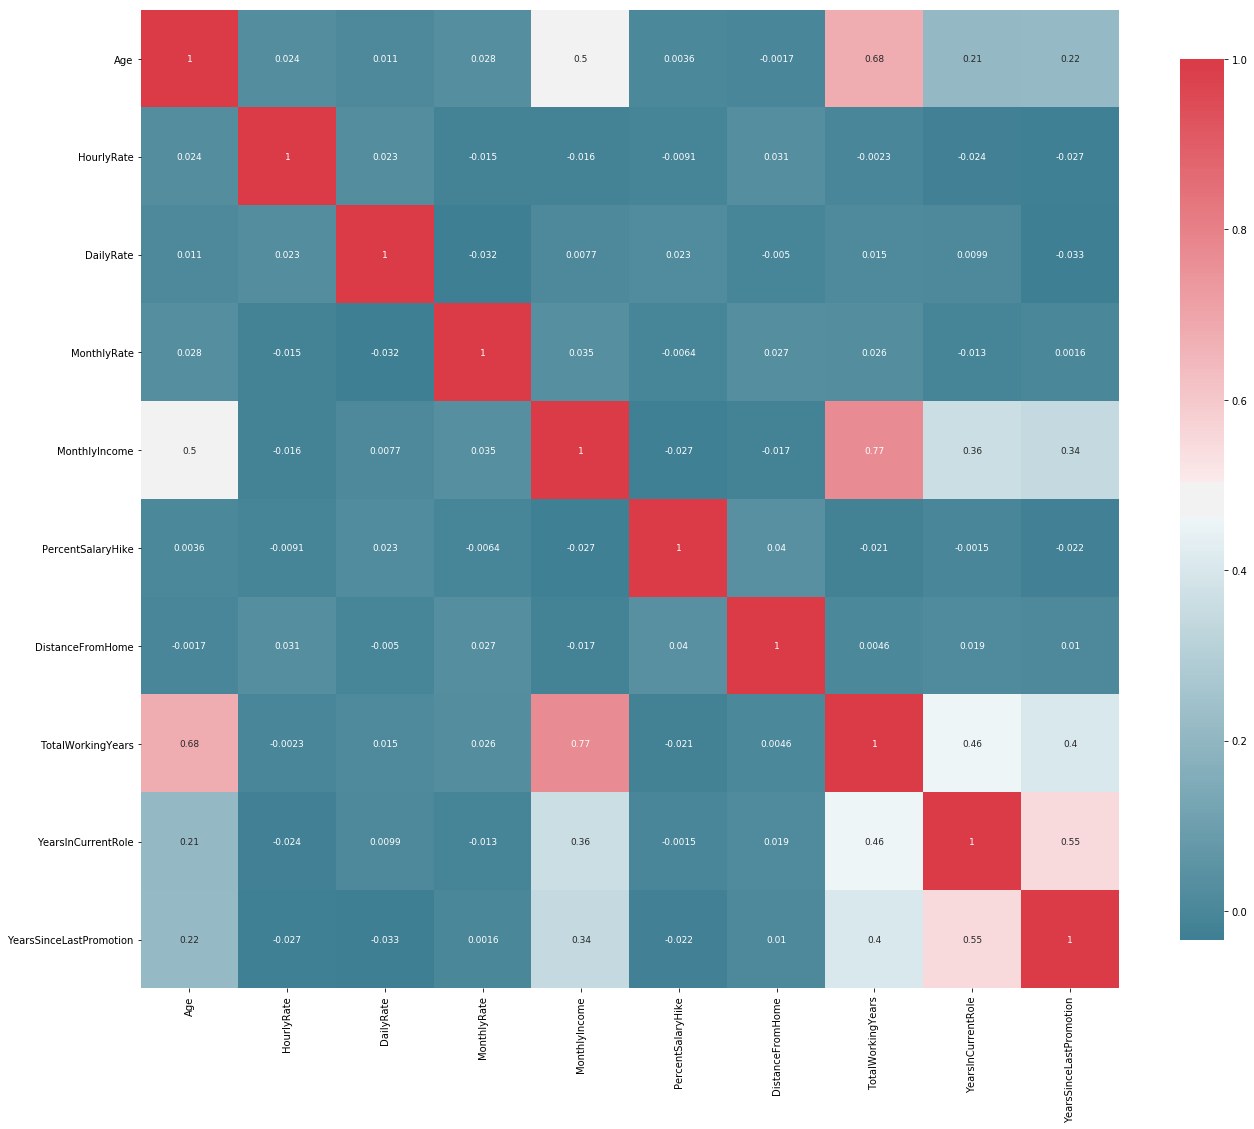

In [8]:
corr = data_df[columns_num+['Attrition']].corr()
_ , ax = plt.subplots( figsize =( 22 , 18 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(corr,cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,annot = True,annot_kws = { 'fontsize' : 9 })

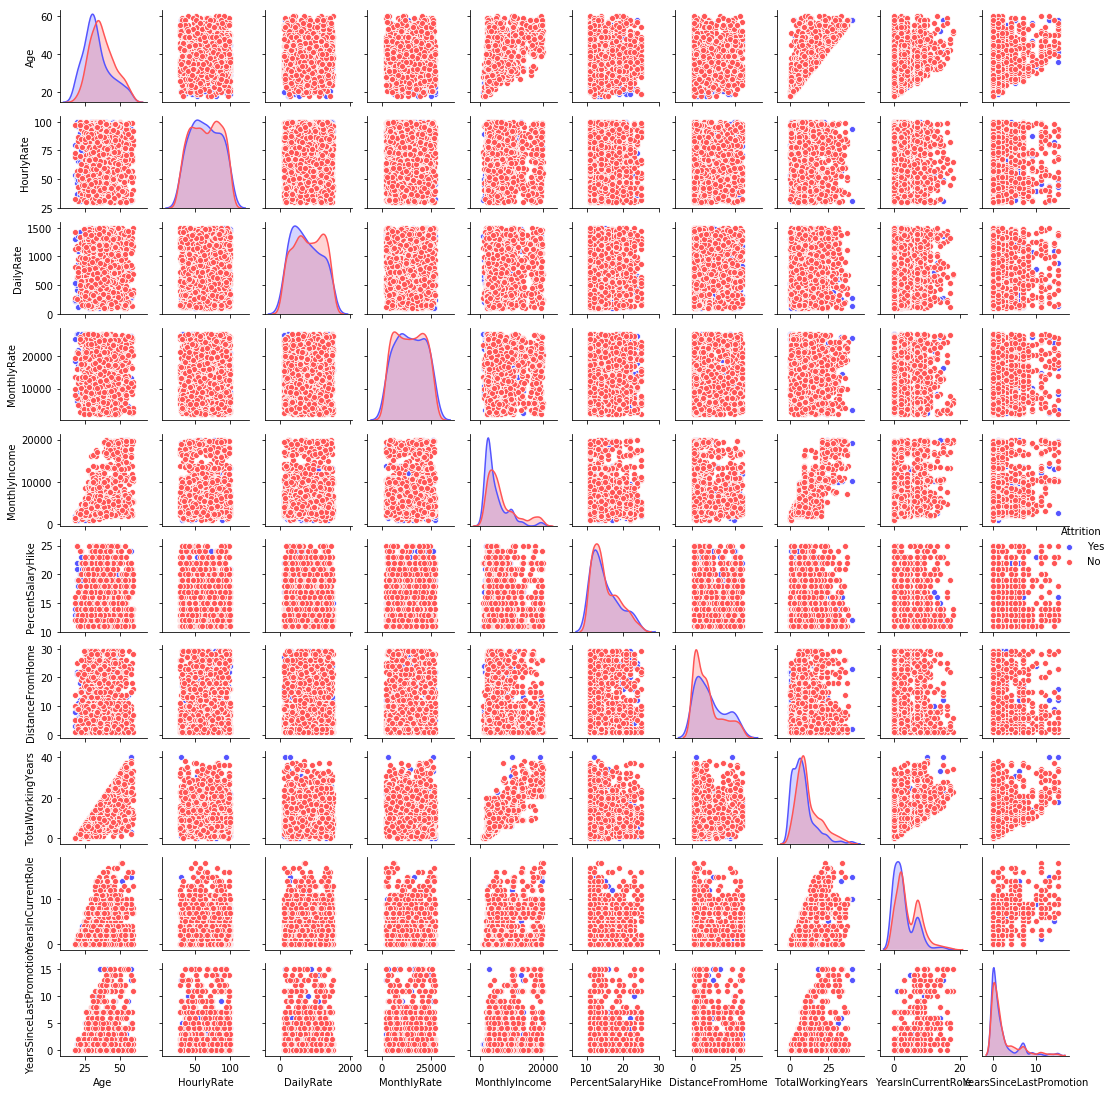

In [9]:
g = sns.pairplot(data_df[columns_num + ['Attrition']], hue='Attrition', palette='seismic', diag_kind = 'kde',
                 diag_kws=dict(shade=True))

g.fig.set_size_inches(15,15)

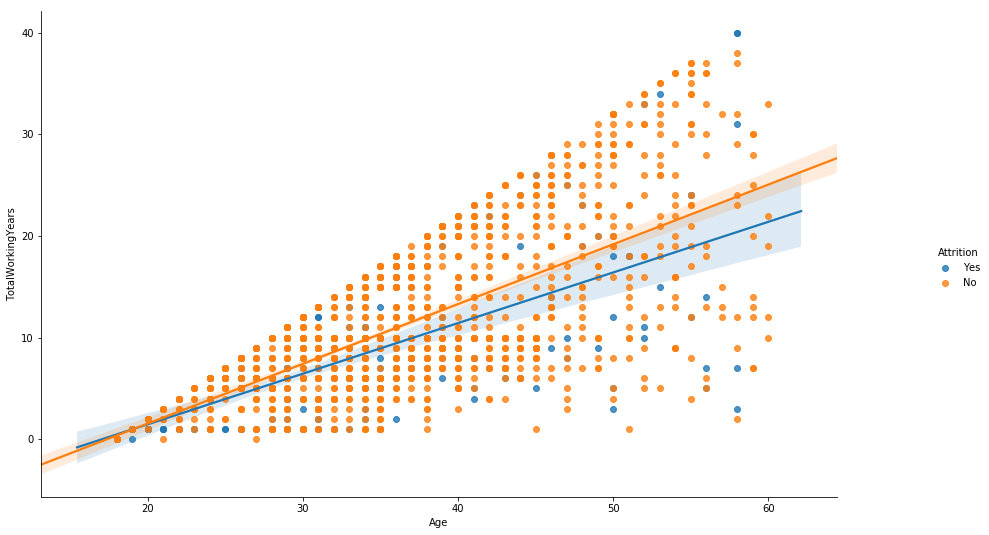

In [10]:
g = sns.lmplot(x='Age', y='TotalWorkingYears', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

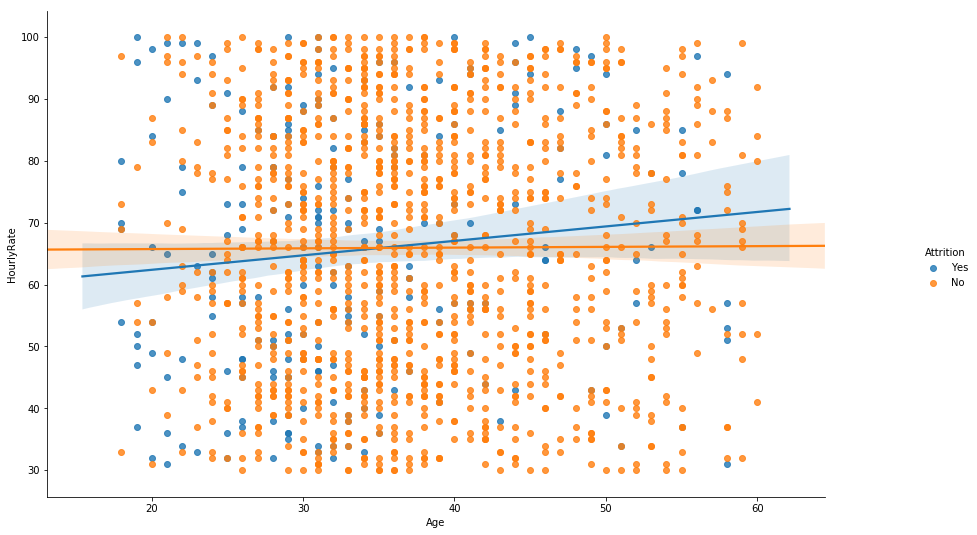

In [11]:
g = sns.lmplot(x='Age', y='HourlyRate', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

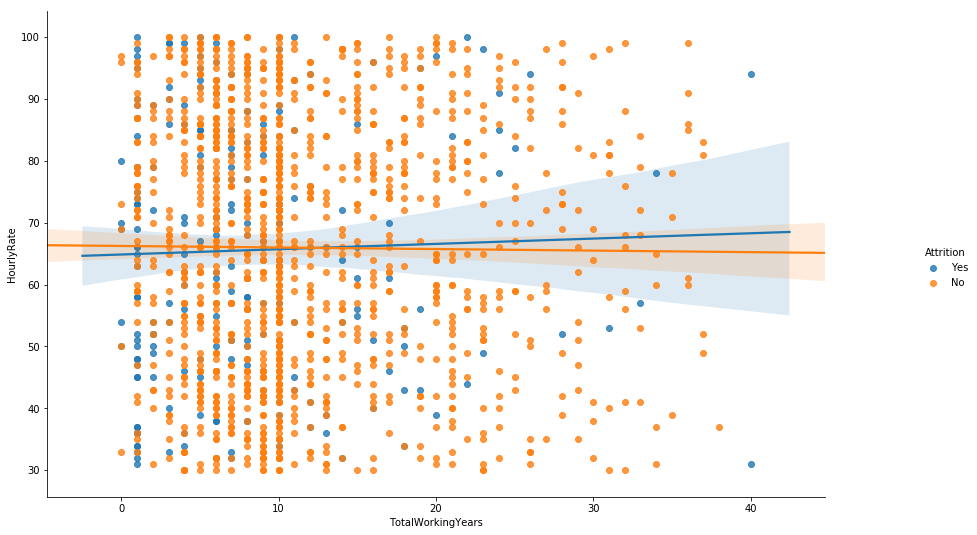

In [12]:
g = sns.lmplot(x='TotalWorkingYears', y='HourlyRate', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

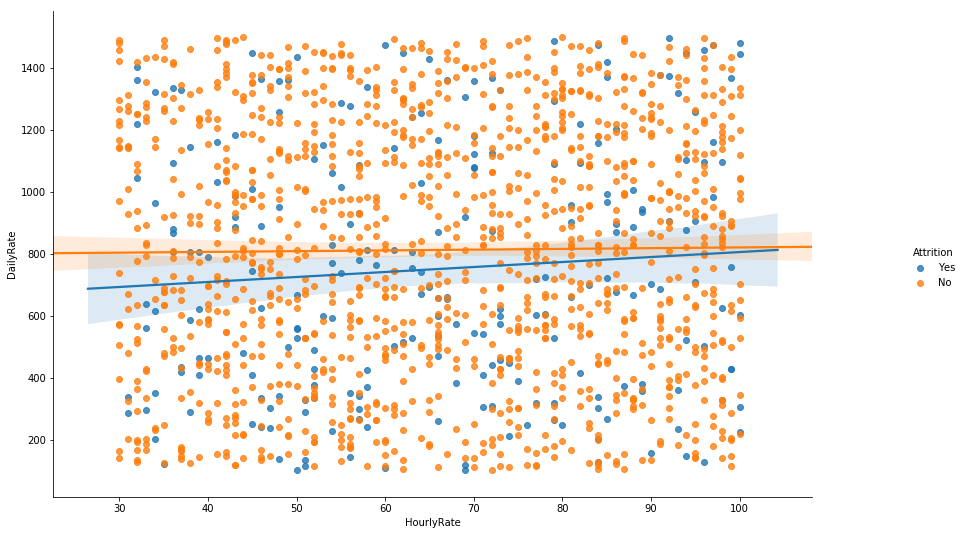

In [13]:
g = sns.lmplot(x='HourlyRate', y='DailyRate', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

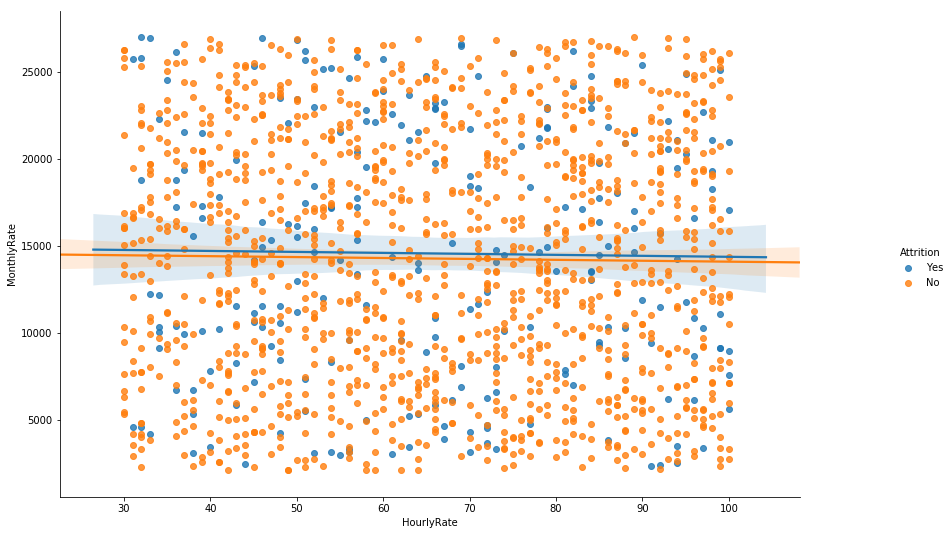

In [14]:
g = sns.lmplot(x='HourlyRate', y='MonthlyRate', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

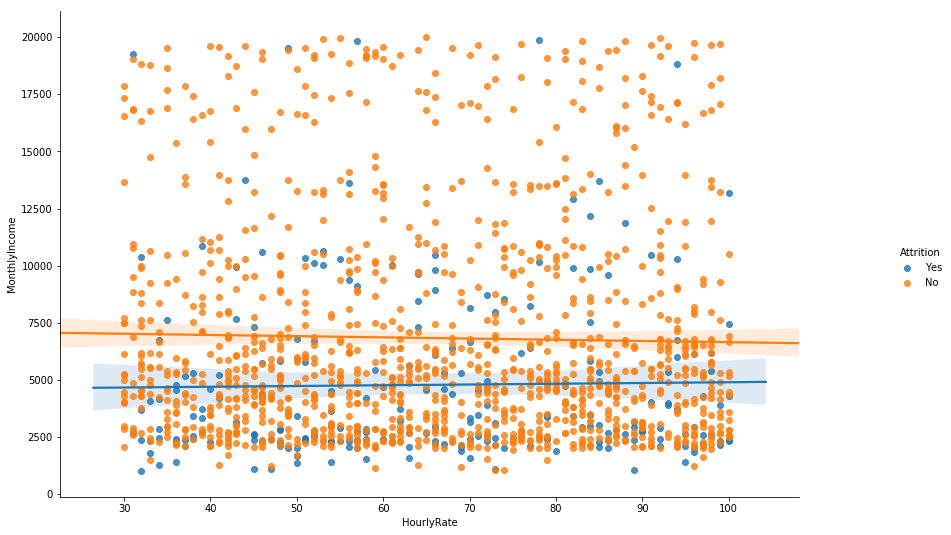

In [15]:
g = sns.lmplot(x='HourlyRate', y='MonthlyIncome', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

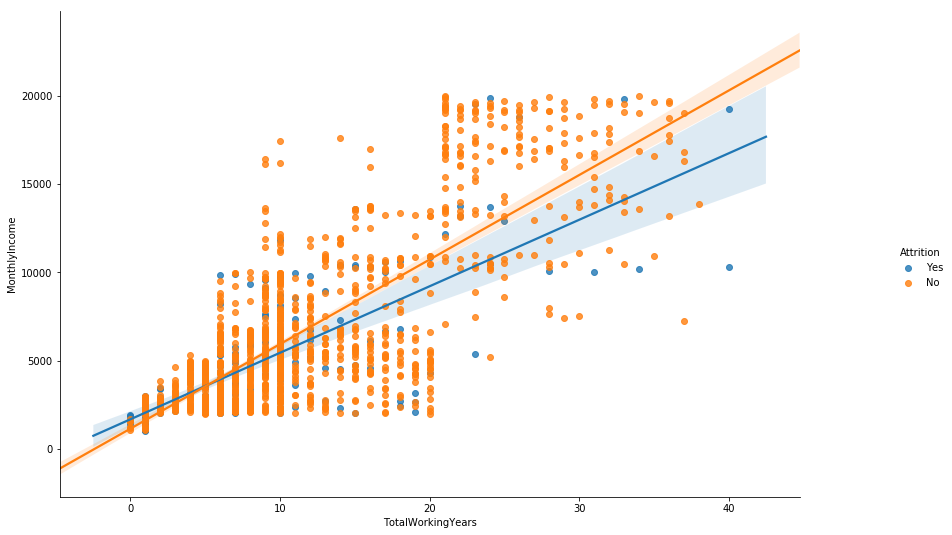

In [16]:
g = sns.lmplot(x='TotalWorkingYears', y='MonthlyIncome', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

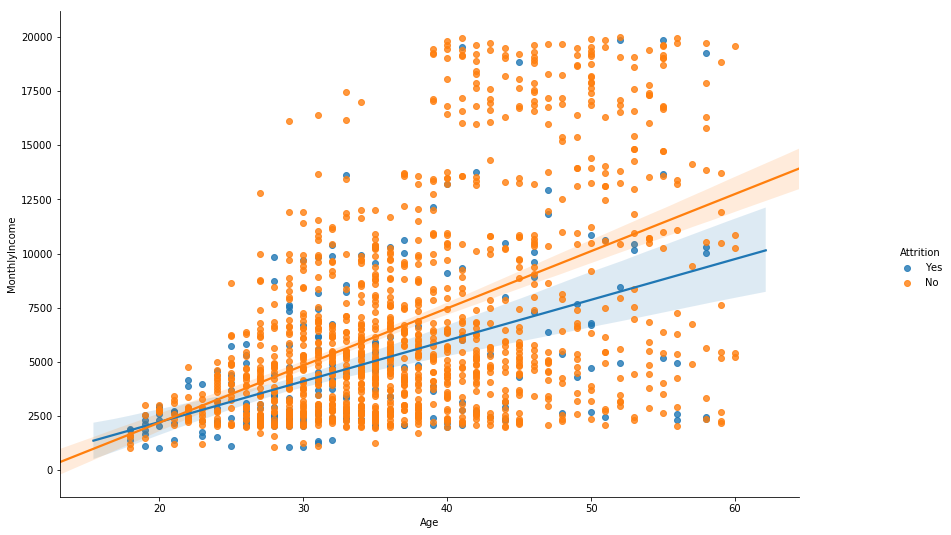

In [17]:
g = sns.lmplot(x='Age', y='MonthlyIncome', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

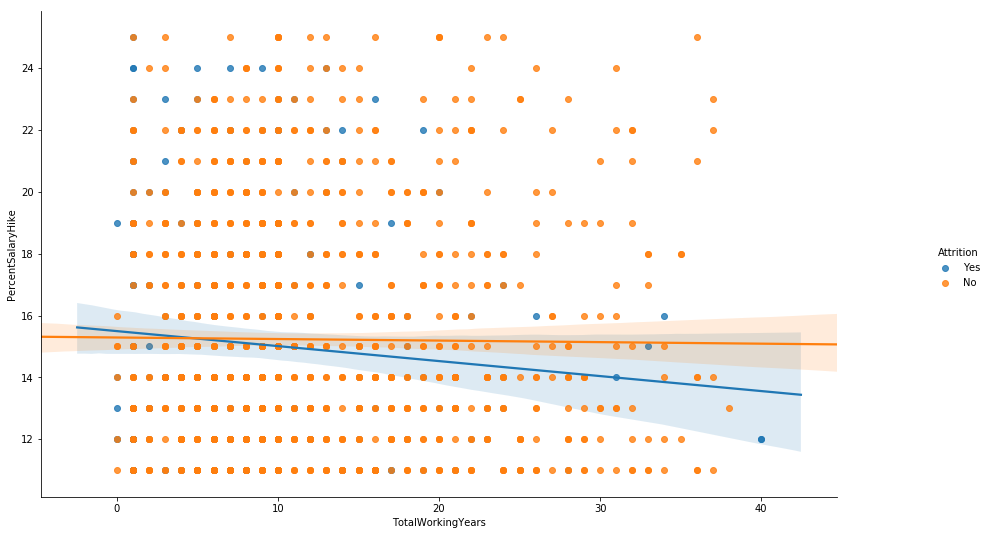

In [18]:
g = sns.lmplot(x='TotalWorkingYears', y='PercentSalaryHike', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

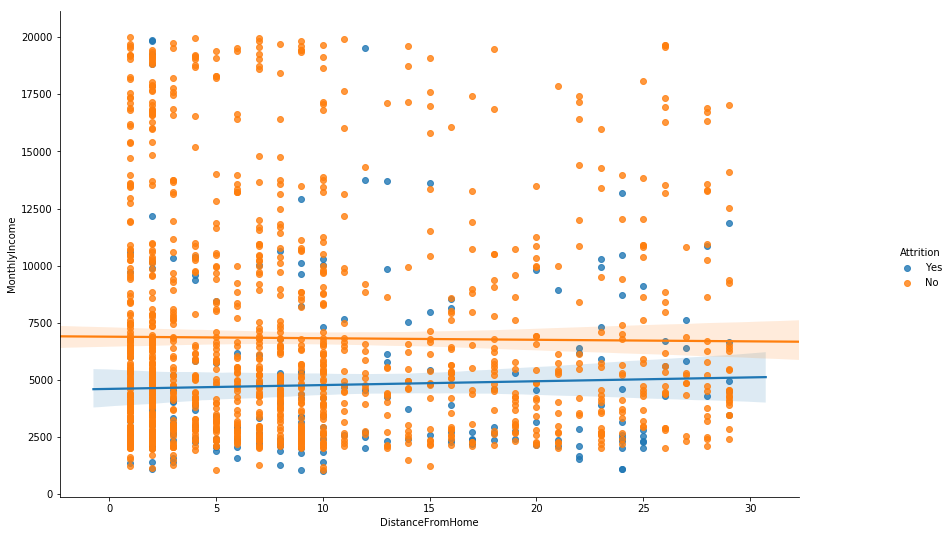

In [19]:
g = sns.lmplot(x='DistanceFromHome', y='MonthlyIncome', hue='Attrition', data=data_df, fit_reg=True)
g.fig.set_size_inches(15,8)

### Data Distribution

#### Continuous Data

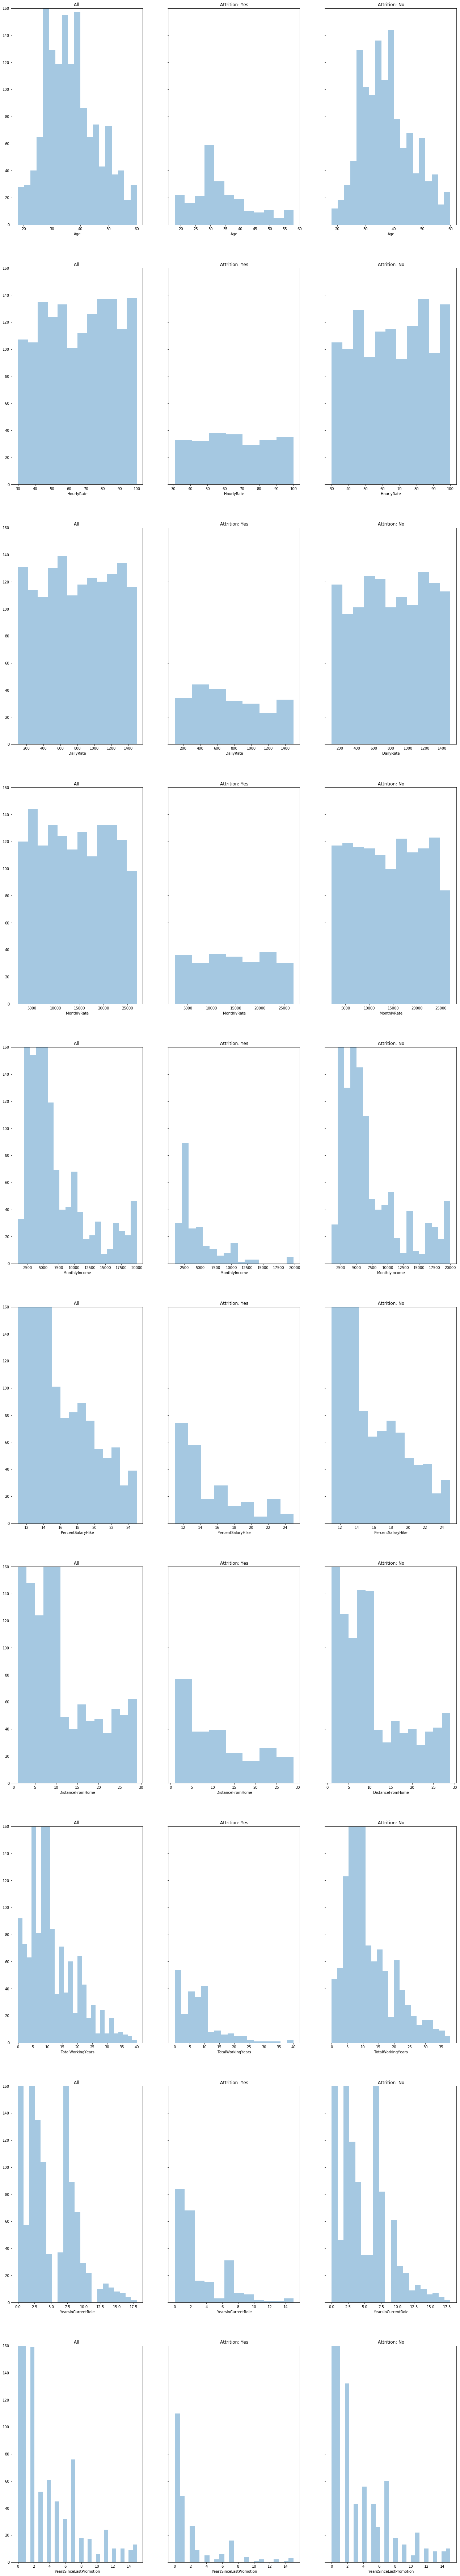

In [20]:
plots_per_row = 3
n = len(columns_num)
fig,ax = plt.subplots(n,plots_per_row, figsize=(22,20), sharey=True)
for i, item in enumerate(columns_num):
    ax[i, 0].set_ylim(0,160)
    ax[i, 0].set_title("All ")
    sns.distplot(data_df[item], ax = ax[i,0], kde=False)
    for j, label in enumerate(['Yes', 'No']):
        #ax[i, j+1].set_ylim(0,150)
        ax[i, j+1].set_title("Attrition: " + label)
        sns.distplot(data_df[item][data_df.Attrition == label], ax = ax[i,j+1], kde=False)

plt.subplots_adjust(bottom=-1.9, top=3)

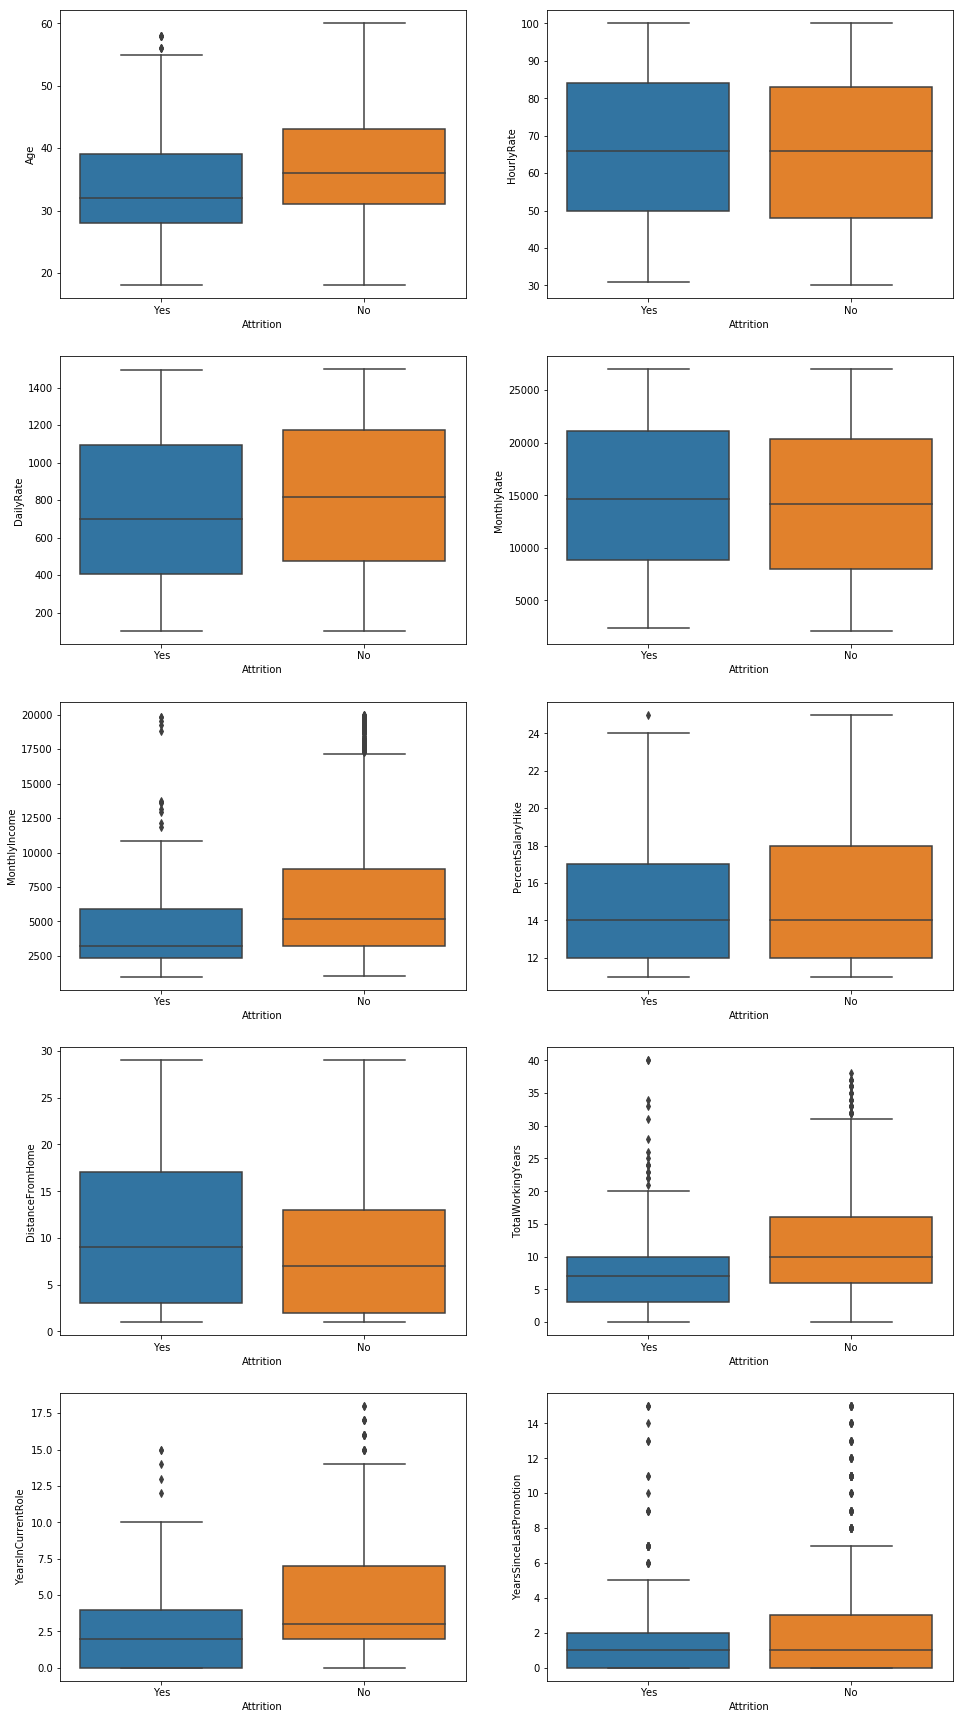

In [21]:
plt.figure(figsize=(16,8))
n = math.ceil(len(columns_num)/2)
j=0
for column in columns_num:
    j +=1
    plt.subplot(n,2,j)
    g = sns.boxplot(x='Attrition', y=column, data=data_df)

plt.subplots_adjust(bottom=-0.9, top=2)

#### Categorical & Discrete Data

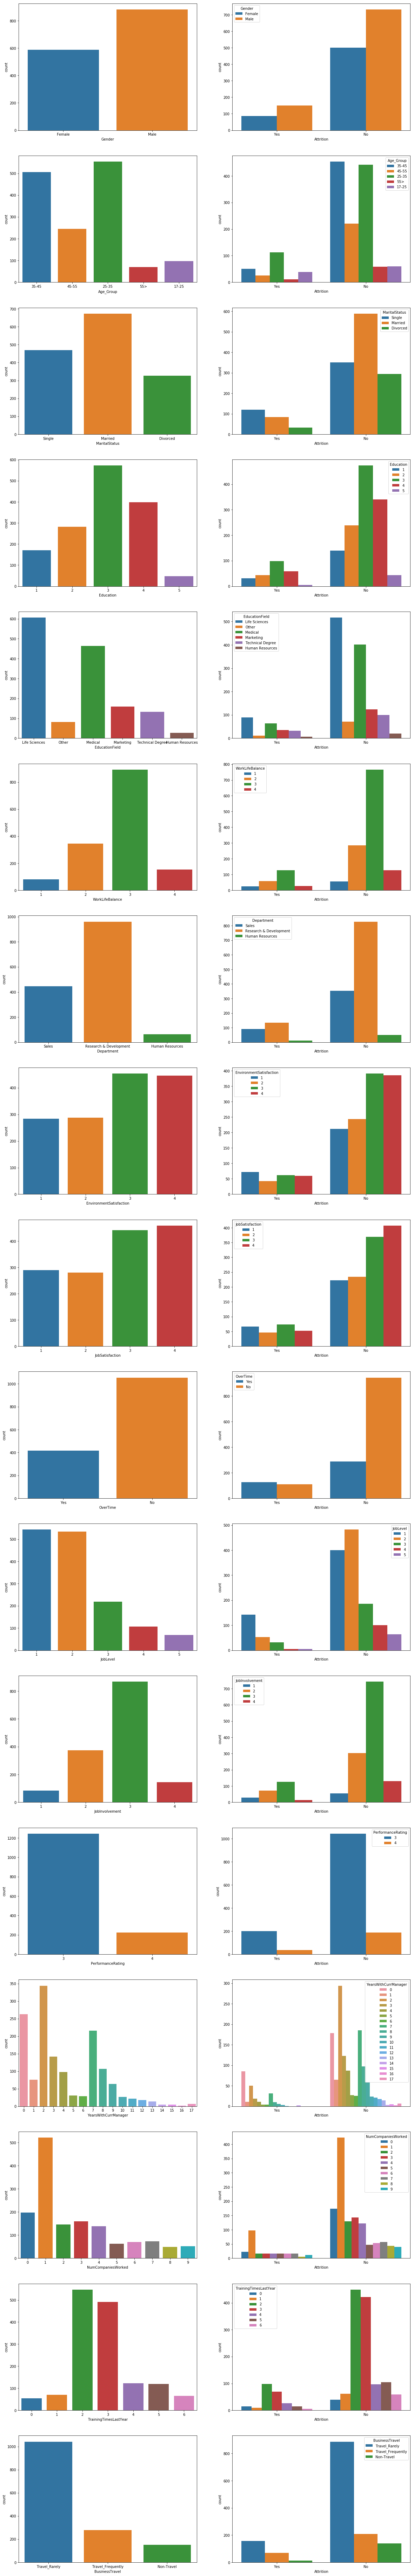

In [22]:
n = len(columns_cat)
fig,ax = plt.subplots(n,2, figsize=(20,26), sharey=False)
for i, column in enumerate(columns_cat):
    sns.countplot(data=data_df,x=column,ax = ax[i,0])
    sns.countplot(data=data_df,x="Attrition",hue=column,ax = ax[i,1])


plt.subplots_adjust(bottom=-0.9, top=3)

#### Monthly Income Analysis

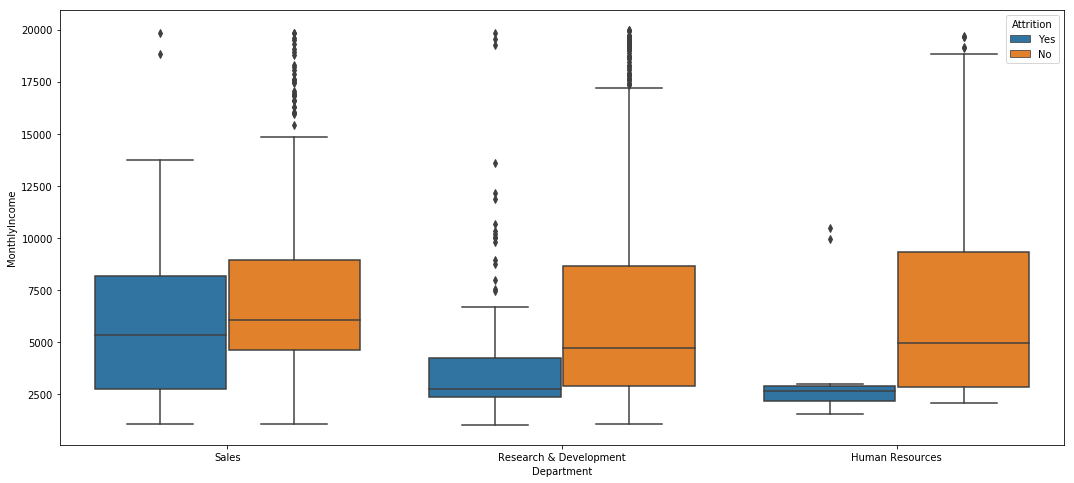

In [23]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='Department', y='MonthlyIncome', hue="Attrition", data=data_df)

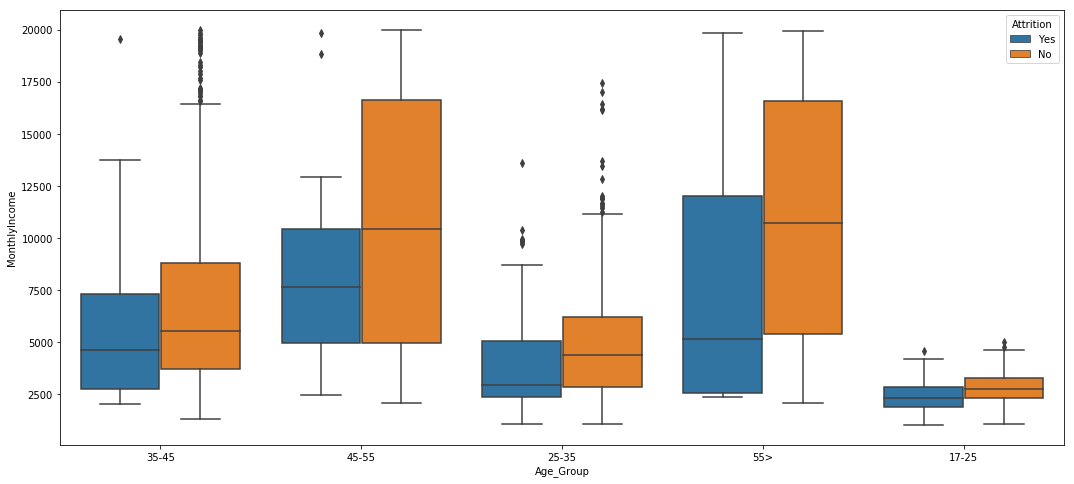

In [24]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='Age_Group', y='MonthlyIncome', hue="Attrition", data=data_df)

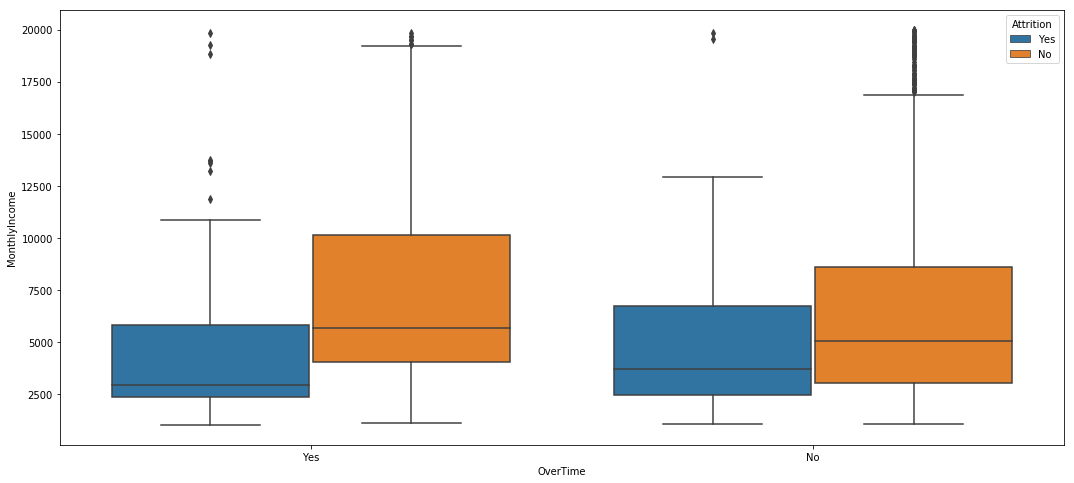

In [25]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='OverTime', y='MonthlyIncome', hue="Attrition", data=data_df)

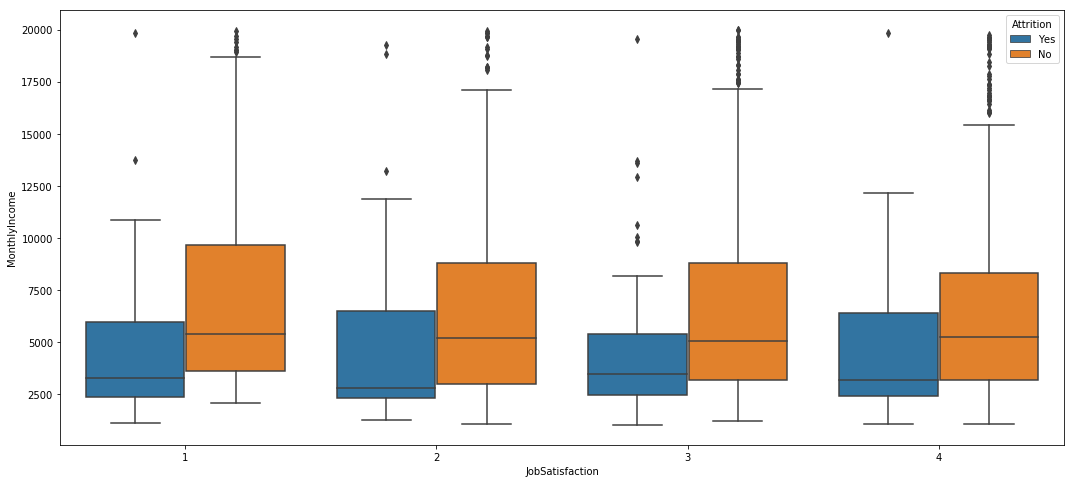

In [26]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', hue="Attrition", data=data_df)

## Observations
1.	Attrition among males was slightly higher than females.
2.	Employees who are “Single”; acknowledged by 8%, were more likely to leave than those who are married and divorced.
3.	Employees in the R&D and Sales departments are more likely to quit compared to the HR department, although the HR department has the least number of employees.
4.	Employees who left had less monthly income compared to those who did not leave employees
5.	There is a quite large difference in monthly income between who left and current employees in the R&D and HR departments
6.	Employees who worked over-time had more Attrition
7.	Employees that were involved highly in their job were more likely to leave
8.	Employees who travelled rarely were more likely to leave.
9.	Employees who used to have longer commute distances were most likely to leave
10.	Employees who spent less under their managers were most likely to leave

Bear in mind that: **"correlation does not imply causation"**, however, such observations should help managers take better decisions. <br>A question emerges: what better desicision should be taken?

# Modeling

<img src="assets/ML_types.PNG" />


As presented above, our target label is discrete (binary). Therefore, we are going to build a classifier to predict whether an employee is likely to leave.

In [27]:
# columns_cat + columns_num + ['Attrition']
feature_variables = ['Age_Group', 'Gender', 'MaritalStatus', 'Education', 'EducationField', 'WorkLifeBalance', 
                     'Department', 'EnvironmentSatisfaction', 'JobSatisfaction', 'OverTime', 'JobLevel',
                     'JobInvolvement', 'PerformanceRating', 'TrainingTimesLastYear', 'BusinessTravel',
                     'MonthlyIncome', 'PercentSalaryHike', 'DistanceFromHome', 'NumCompaniesWorked', 
                     'TotalWorkingYears', 'YearsWithCurrManager','Attrition'] 

In [28]:
df = data_df[feature_variables]

for col in columns_cat:
    df_ = pd.get_dummies(df[col], prefix=col)
    df = df.drop(col, axis=1)
    df = pd.concat([df, df_], axis=1)
    
df['Attrition']=np.where(df['Attrition']=='No', 0, 1)

In [29]:
X=df.drop(['Attrition'], axis=1)
y=df.Attrition

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [30]:
import pickle
with open('pickles/features.pickle', 'wb') as handle:
    pickle.dump(X_train.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [31]:
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
estimator = Pipeline([
    ('scaler',StandardScaler()),
    ('estimator', RandomForestClassifier(criterion="gini", 
                                                 max_features=0.75, 
                                                 min_samples_leaf=2, min_samples_split=9, 
                                                 n_estimators=80,
                                                 max_leaf_nodes=1024))])

# RandomForestClassifier(n_estimators=20,max_features='auto', max_depth=4)
clf = estimator.fit(X_train, y_train)

from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,precision_recall_curve, \
                            confusion_matrix,precision_score,confusion_matrix

predictions=clf.predict(X_test)
print("Accuracy ",accuracy_score(predictions,y_test))
print("ROC_AUC  ",roc_auc_score(predictions,y_test))
print("Classification Report \n",classification_report(predictions,y_test))

Accuracy  0.8401360544217688
ROC_AUC   0.6824817518248174
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       274
           1       0.21      0.50      0.30        20

   micro avg       0.84      0.84      0.84       294
   macro avg       0.59      0.68      0.60       294
weighted avg       0.91      0.84      0.87       294



In [32]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[237  10]
 [ 37  10]]


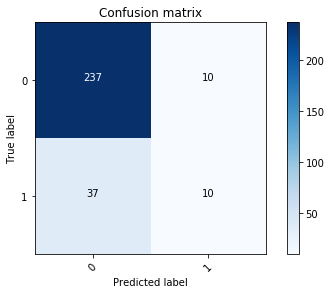

In [33]:
class_names = ['0', '1']
confusion_matrix=confusion_matrix(y_test,predictions)
plot_confusion_matrix(confusion_matrix, classes=class_names,
                      title='Confusion matrix')

In [34]:
def show_most_importance(clf, n):
    '''
    This is to show the most important features
    clf: is the trained model
    n: the highest n readings
    '''
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
    indices = np.argsort(importances)[::-1][:n] # This to show the top ten
    feat_names = df.drop('Attrition',1).columns.values
    plt.figure(figsize=(16,12))
    plt.title("Feature importances")
    plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
    plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
    plt.xlim([-1, len(indices)])
    plt.show()

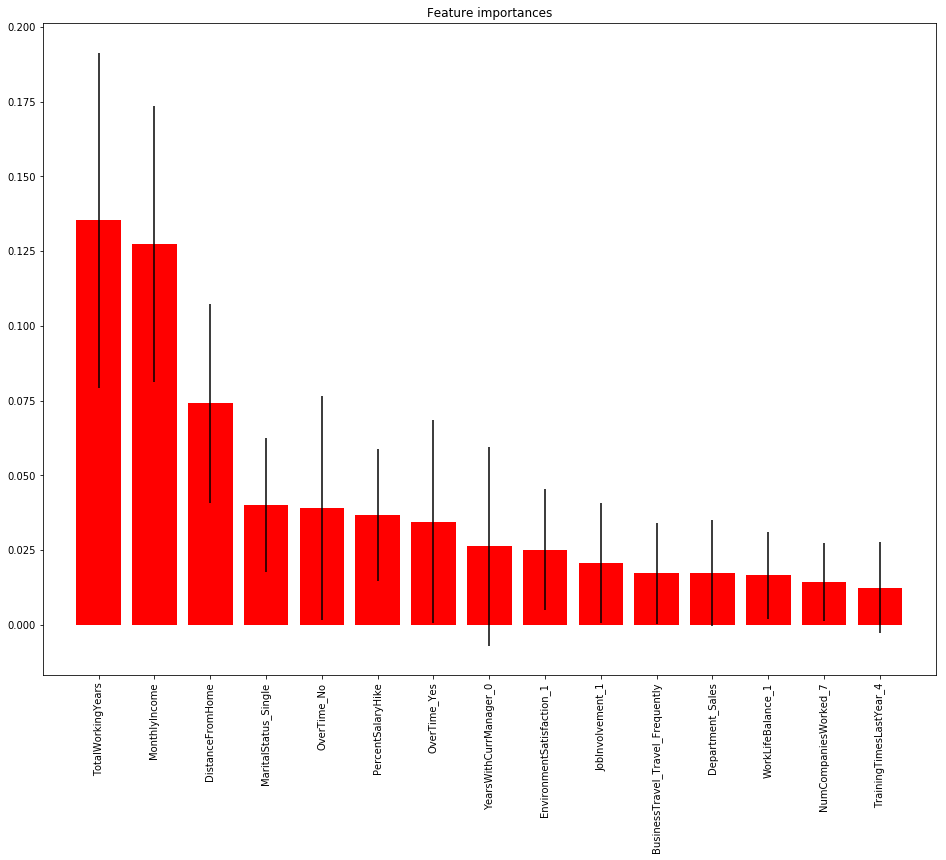

In [35]:
show_most_importance(clf.steps[1][1], 15)

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.001, 1.0, 10)):
    """
    This function is to generate a simple plot of the test and traning learning curve.
    """
    plt.figure(figsize = (16,15))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.yticks(np.arange(0.0, 1.1, 0.010))
    plt.tick_params(labelright=True)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

CPU times: user 328 ms, sys: 53.8 ms, total: 381 ms
Wall time: 6.61 s


<module 'matplotlib.pyplot' from '/Users/rami/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

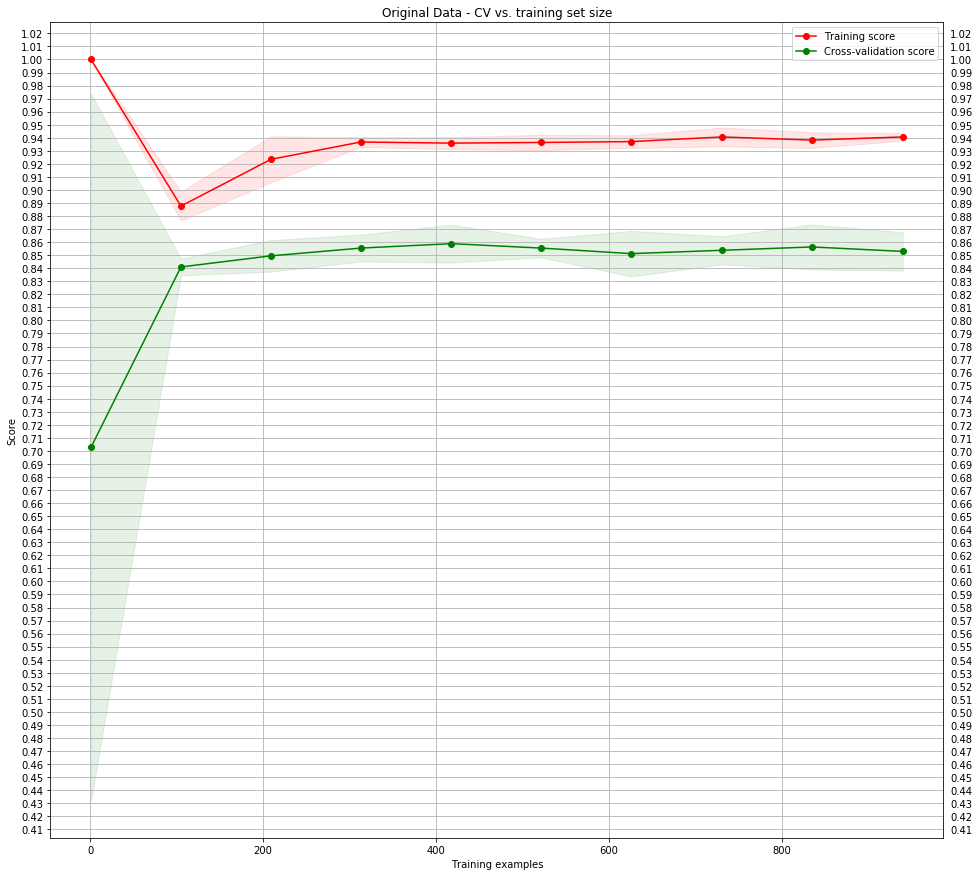

In [37]:
%time plot_learning_curve(estimator, "Original Data - CV vs. training set size", X_train, y_train, cv=5)

### RF Model Improvement

In [38]:
from imblearn.over_sampling import RandomOverSampler


X = df.loc[:, df.columns != "Attrition"].values
y = df.loc[:, df.columns == "Attrition"].values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

ros = RandomOverSampler(random_state=101)
X_train_u, y_train_u = ros.fit_sample(X_train, y_train)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))

# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)

X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (1176, 91) (1176,)
Upsampled shape: (2958, 91) (2958,)
Downsampled shape: (380, 91) (380,)


Original
The best hyperparameters for Original data:
criterion :  entropy
max_features :  0.9
min_samples_leaf :  5
n_estimators :  50
Confusion matrix, without normalization
[[241   6]
 [ 35  12]]
Accuracy  0.8605442176870748
Recall  0.2553191489361702
ROC_AUC   0.7699275362318839
Best f1-score: 28.07%.
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       276
           1       0.26      0.67      0.37        18

   micro avg       0.86      0.86      0.86       294
   macro avg       0.62      0.77      0.65       294
weighted avg       0.93      0.86      0.89       294



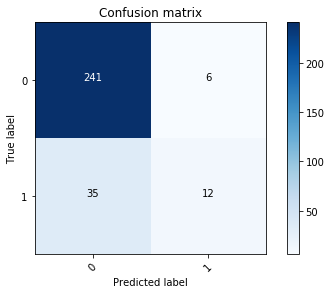

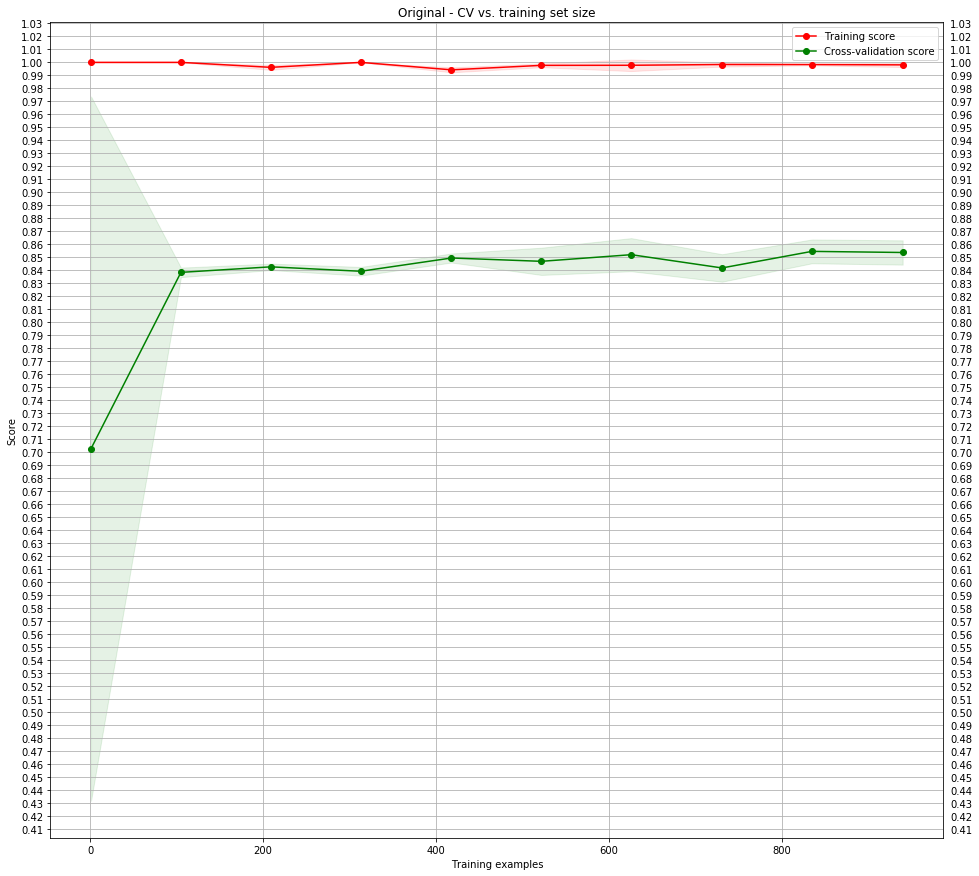

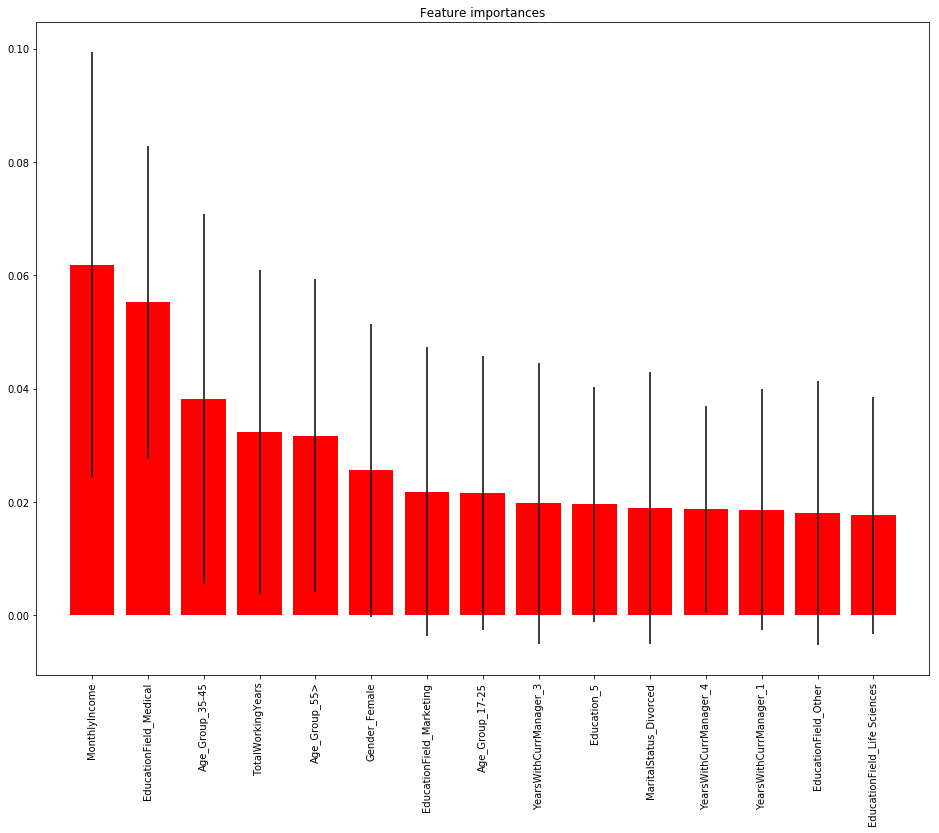

Upsampled
The best hyperparameters for Upsampled data:
criterion :  entropy
max_features :  sqrt
min_samples_leaf :  2
n_estimators :  100
Confusion matrix, without normalization
[[246   1]
 [ 44   3]]
Accuracy  0.8469387755102041
Recall  0.06382978723404255
ROC_AUC   0.7991379310344828
Best f1-score: 99.90%.
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       290
           1       0.06      0.75      0.12         4

   micro avg       0.85      0.85      0.85       294
   macro avg       0.53      0.80      0.52       294
weighted avg       0.98      0.85      0.91       294



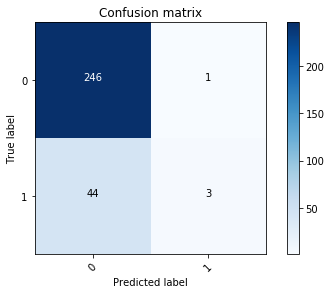

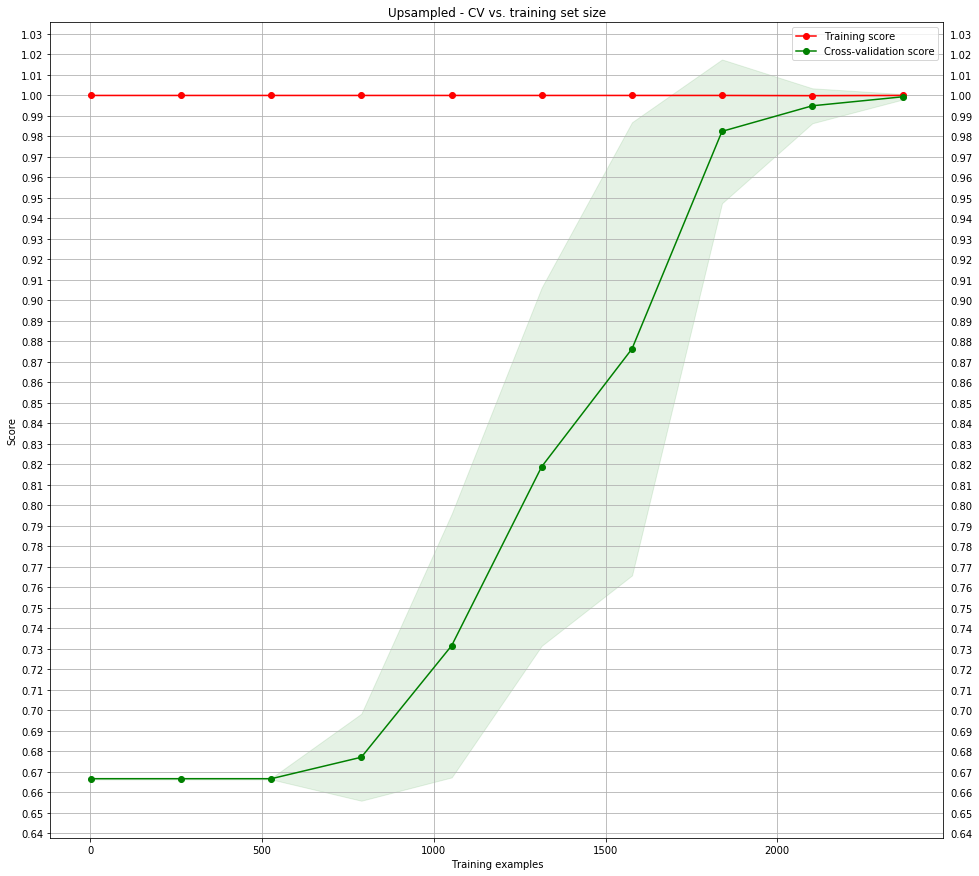

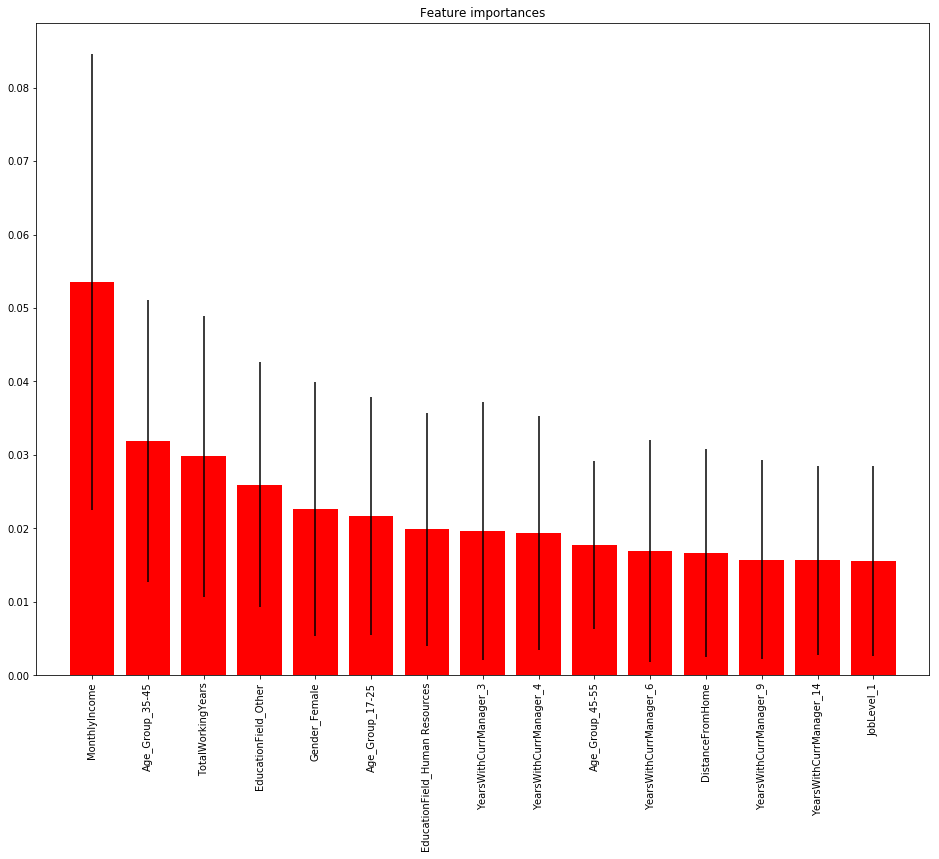

Downsampled
The best hyperparameters for Downsampled data:
criterion :  gini
max_features :  0.4
min_samples_leaf :  3
n_estimators :  100
Confusion matrix, without normalization
[[147 100]
 [  5  42]]
Accuracy  0.6428571428571429
Recall  0.8936170212765957
ROC_AUC   0.6314399555226093
Best f1-score: 72.74%.
Classification Report 
               precision    recall  f1-score   support

           0       0.60      0.97      0.74       152
           1       0.89      0.30      0.44       142

   micro avg       0.64      0.64      0.64       294
   macro avg       0.74      0.63      0.59       294
weighted avg       0.74      0.64      0.60       294



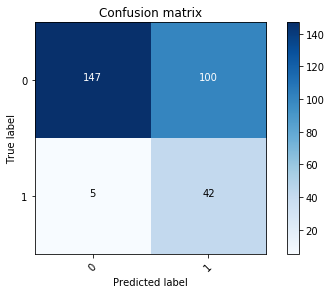

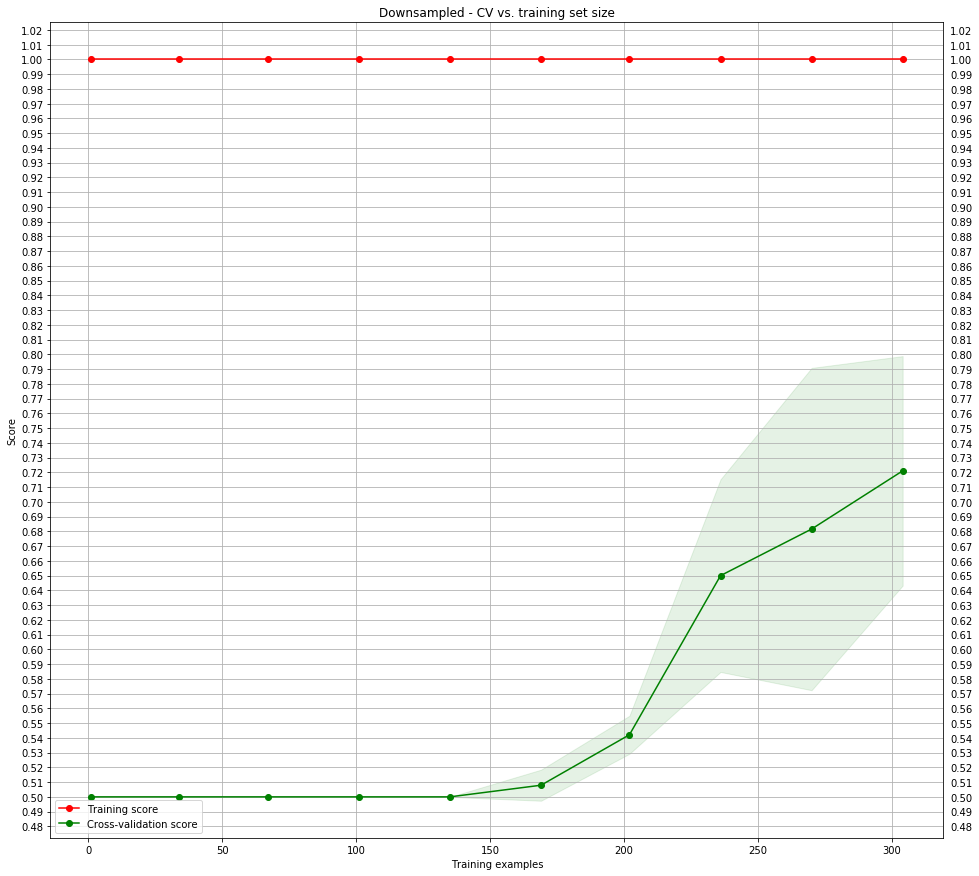

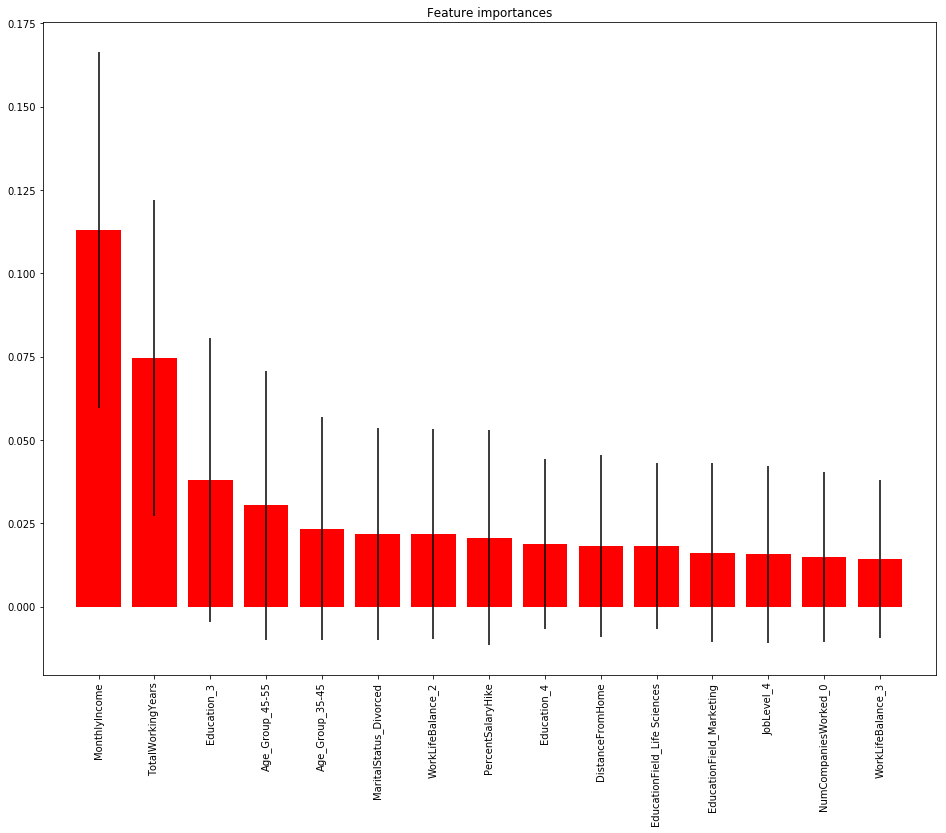

In [39]:
methods_data = {# "Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "Downsampled": (X_train_d, y_train_d)
               }

for method in methods_data.keys():
    print('='*50)
    print(method)
    print('='*50)
    pip_rf = make_pipeline(StandardScaler(),
                           PCA(iterated_power=5, svd_solver="randomized"),
                           RandomForestClassifier(class_weight="balanced",
                                                  max_leaf_nodes=512,
                                                  random_state=101))
    
    hyperparam_grid = {
        "randomforestclassifier__n_estimators":  [20, 50, 80, 100],
        "randomforestclassifier__max_features": ["sqrt", "log2", 0.4, 0.5,0.75,0.90, 1.0],
        "randomforestclassifier__min_samples_leaf": [2, 3, 5],
        "randomforestclassifier__criterion": ["gini", "entropy"]
    }
    
    gs_rf = GridSearchCV(pip_rf,
                         hyperparam_grid,
                         scoring= "f1",
                         cv=5,
                         n_jobs=-1)
    X_t, y_t = methods_data[method][0], methods_data[method][1]
    gs_rf.fit(X_t, y_t)
    
    print("\033[1m" + "\033[0m" + "The best hyperparameters for {} data:".format(method))
    for hyperparam in gs_rf.best_params_.keys():
        print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_rf.best_params_[hyperparam])

    test_df = pd.DataFrame(y_test)
    test_df.columns = ['Attrition']
    test_df['Attrition_Pred']=gs_rf.best_estimator_.predict(X_test)
    
    from sklearn.metrics import confusion_matrix

    y_true = list(np.array(test_df['Attrition']))
    y_pred = list(np.array(test_df['Attrition_Pred']))
    class_names = ['0', '1']
    confusion_matrix=confusion_matrix(y_true,y_pred)
    plot_confusion_matrix(confusion_matrix, classes=class_names,
                          title='Confusion matrix')
    
    
    print("Accuracy ",accuracy_score(test_df['Attrition_Pred'],test_df['Attrition']))
    print("Recall ",recall_score(test_df['Attrition'],test_df['Attrition_Pred']))
    print("ROC_AUC  ",roc_auc_score(test_df['Attrition_Pred'],test_df['Attrition']))
    print("\033[1m" + "\033[94m" + "Best f1-score: {:.2f}%.".format((gs_rf.best_score_) * 100)) 
    
    print("Classification Report \n",classification_report(test_df['Attrition_Pred'],test_df['Attrition']))
    
    plot_learning_curve(gs_rf.best_estimator_, method + " - CV vs. training set size", X_t, y_t, cv=5)
    
    clf_ = gs_rf.best_estimator_.steps[2][1]
    show_most_importance(clf_, 15)
    
    if method == "Upsampled":
        with open('pickles/clf_TO_' + method + '.pickle', 'wb') as handle:
                pickle.dump(gs_rf.best_estimator_, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    
    

### Experiencing SVM

Original
Confusion matrix, without normalization
[[299  10]
 [ 41  18]]
Accuracy  0.8614130434782609
Recall  0.3050847457627119
ROC_AUC   0.7611344537815126
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       340
           1       0.31      0.64      0.41        28

   micro avg       0.86      0.86      0.86       368
   macro avg       0.64      0.76      0.67       368
weighted avg       0.92      0.86      0.88       368



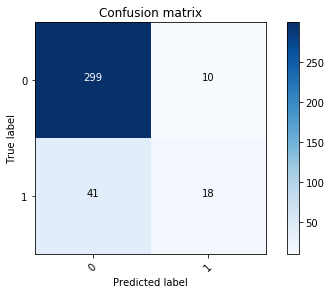

In [39]:
from sklearn.svm import SVC

X=df.drop(['Attrition'], axis=1)
y=df.Attrition

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)


methods_data = {"Original": (X_train, y_train)}

for method in methods_data.keys():
    print('='*50)
    print(method)
    print('='*50)
    
    svm = SVC(kernel='linear', probability=True)
    
    X_t, y_t = methods_data[method][0], methods_data[method][1]
    clf = svm.fit(X_t,y_t)

    test_df = pd.DataFrame(y_test)
    test_df.columns = ['Attrition']
    test_df['Attrition_Pred']=clf.predict(X_test)
    
    from sklearn.metrics import confusion_matrix

    y_true = list(np.array(test_df['Attrition']))
    y_pred = list(np.array(test_df['Attrition_Pred']))
    class_names = ['0', '1']
    confusion_matrix=confusion_matrix(y_true,y_pred)
    plot_confusion_matrix(confusion_matrix, classes=class_names, title='Confusion matrix')
    
    
    print("Accuracy ",accuracy_score(test_df['Attrition_Pred'],test_df['Attrition']))
    print("Recall ",recall_score(test_df['Attrition'],test_df['Attrition_Pred']))
    print("ROC_AUC  ",roc_auc_score(test_df['Attrition_Pred'],test_df['Attrition']))    
    print("Classification Report \n",classification_report(test_df['Attrition_Pred'],test_df['Attrition']))

CPU times: user 320 ms, sys: 127 ms, total: 447 ms
Wall time: 1h 34min 34s


<module 'matplotlib.pyplot' from '/Users/rami/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

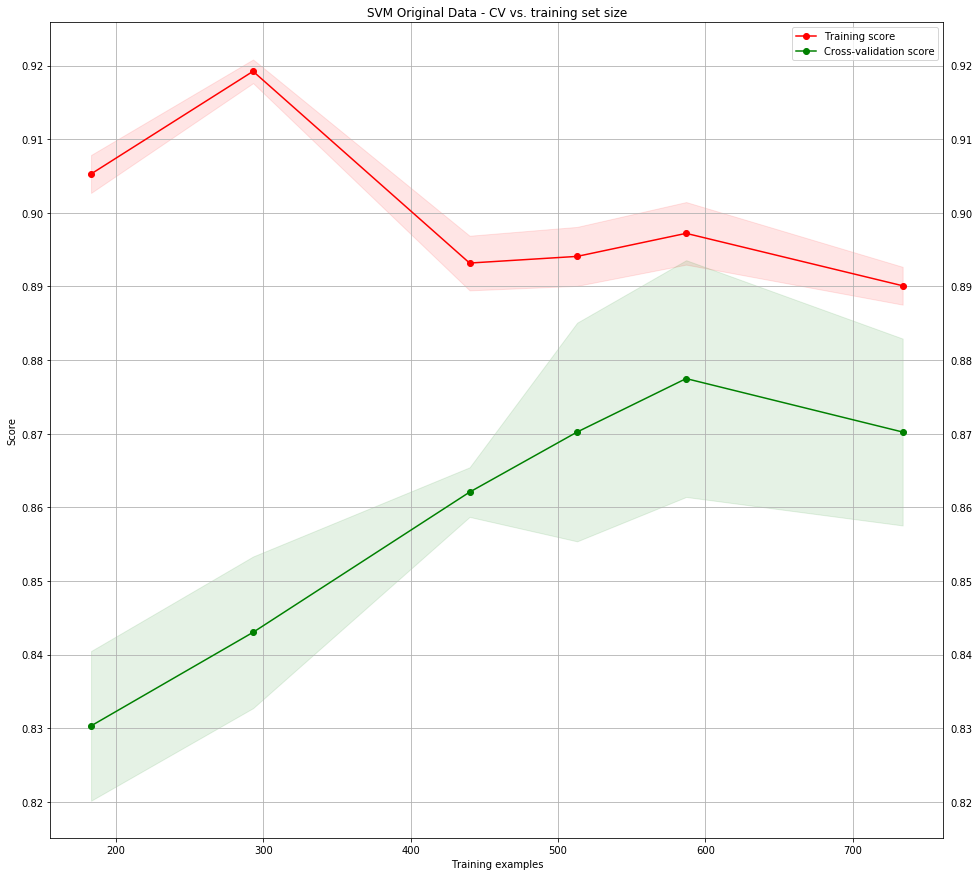

In [45]:
%time plot_learning_curve(svm, "SVM Original Data - CV vs. training set size", X_train, y_train, cv=3, train_sizes=[0.25,0.4,0.6,0.7,0.8,1.0])

In [46]:
with open('pickles/clf_TO_SVM.pickle', 'wb') as handle:
    pickle.dump(clf, handle, protocol=pickle.HIGHEST_PROTOCOL)

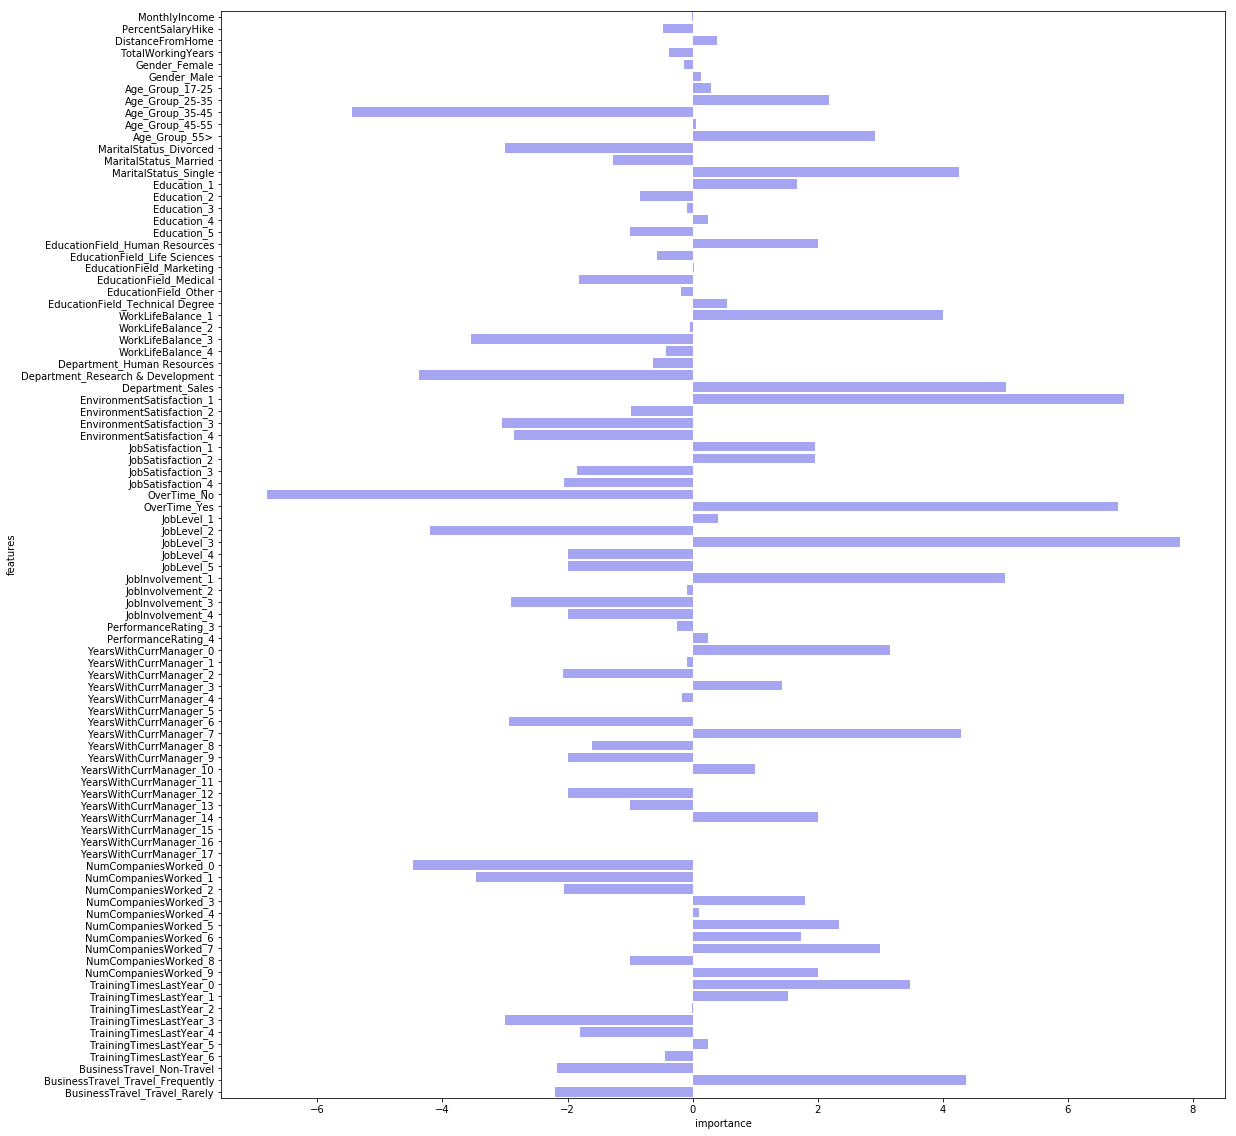

In [47]:
def read_from_pickle(pickle_fname):
    with open('pickles/' + pickle_fname+'.pickle', 'rb') as handle:
        return pickle.load(handle)
features = read_from_pickle('features')
importance = clf.coef_[0]
df_ = pd.DataFrame({'features': features, 
                  'importance': importance}) #.sort_values(by="importance")

plt.figure(figsize=(18, 20))
sns.barplot(y="features", x="importance", data=df_, color="b", alpha=.4)

## End of Notebook